# Problem Set 1 - Helen Chen
### 1. Plotting virus assembly trajectories
- 'CapsidAssemblyTrajectories.zip' contains trajectories from the hepatitis B virus (HBV) capsid assembling
- Each file corresponds to a trajectory of growth of a single capsid
- Each file name is formatted GB-{$g_b$}_{$s$}.txt
  - GB = binding strength gB of the capsid proteins (in units of the thermal energy, kBT)
  - s = the random number seed
- 3 columns in each file: 
  1. **the time step (in some non-dimensionalized units)**
  2. number of vertices in a graph structure description of the partial capsid
  3. **number of dimer subunits in the partial capsid**

**a.** unix commands practice\
**b.** unix commands practice\
**c.**
  - Plot capsid size (column 3) as a function of time (column 1)
  - choose *any one* trajectory for each of gB= −6.6,−7.0,−7.2,−7.8
  - Make a legend that labels gb for each curve.

Text(0, 0.5, 'dimer units in partial capsid')

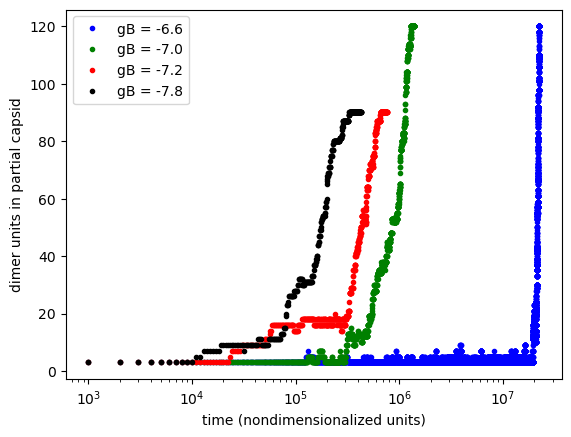

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class HBVTrajectory:
    def __init__(self, gB: float, color: str):
        self.gB: float = gB
        self.filepath: str = "trajectories/GB-" + str(gB) + "_7.txt"
        self.color:str = color

trajectories: list[HBVTrajectory] = [
    HBVTrajectory(-6.6, "b"),
    HBVTrajectory(-7.0, "g"),
    HBVTrajectory(-7.2, "r"),
    HBVTrajectory(-7.8, "k"),
]

for trajectory in trajectories: 
    with open(trajectory.filepath) as file:
        lines: list[str] = file.readlines()
        lines = lines[1:]
        time_points: np.ndarray = np.empty(len(lines), dtype=int)
        dimer_points: np.ndarray = np.empty(len(lines), dtype=int)
        for i, line in enumerate(lines): 
            time_points[i], _, dimer_points[i] = line.split(" ")
        plt.plot(time_points, dimer_points, ".", label="gB = " + str(trajectory.gB), color=trajectory.color)

plt.ticklabel_format(style='plain')
plt.semilogx()
plt.legend()
plt.xlabel("time (nondimensionalized units)")
plt.ylabel("dimer units in partial capsid")

### 2. SIR Model
**a.**  Show that if we define a dimensionless time, $\bar{t} = \gamma t$, the equations can be written in a simpler form: 

> The following assumes that $\frac{1}{\gamma}\cdot\frac{dF}{dt}=\frac{dF}{d(\gamma t)} = \frac{dF}{d\bar{t}}$ for functions $S$, $I$, and $R$
> $$R_0 = \frac{\beta}{\gamma}
\\\ \\\ \\\
\frac{dS}{dt} = -\beta SI \quad\quad\quad
\frac{dI}{dt} = \beta SI - \gamma I \quad\quad\quad
\frac{dR}{dt} = \gamma I 
\\\ \\\ \\\
\frac{1}{\gamma}\cdot\frac{dS}{dt} = -\frac{\beta}{\gamma} SI \quad\quad
\frac{1}{\gamma}\cdot\frac{dI}{dt} = \frac{\beta}{\gamma} SI - \frac{\gamma}{\gamma} I \quad\quad
\frac{1}{\gamma}\cdot\frac{dR}{dt} = \frac{\gamma}{\gamma} I 
\\\ \\\ \\\
\frac{dS}{d(\gamma t)} = -R_0 SI = \frac{dS}{d\bar{t}} \quad\quad
\frac{dI}{d(\gamma t)} = R_0 SI - I = \frac{dI}{d\bar{t}} \quad\quad
\frac{dR}{d(\gamma t)} = I = \frac{dR}{d\bar{t}}
\\\ \\\ \\\
$$
**b.** Plot the time evolution of each category (on the same plot) for: 
- $R_0 = 10$
- $I(0) = 1.0\times 10^{-5}$
- $S(0) = 1 - I(0)$
- Use the simple Euler algorithm in tutorial

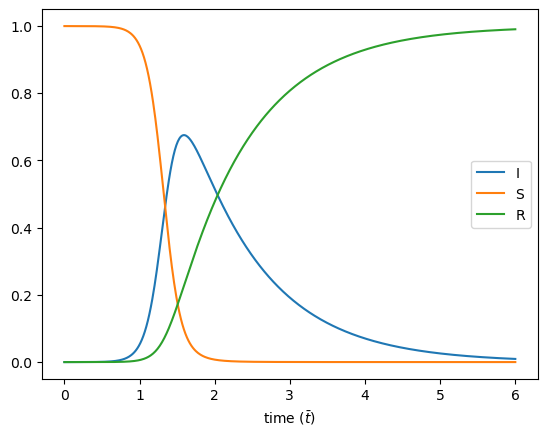

In [2]:
R0_var: int = 10 # basic reproductive ratio
I_var: float = 0.00001
S_var: float = 1.0 - I_var
R_var: float = 0.0
tbar: float = 0.0

delta_time: float = 0.01
total_time: float = 6.0

num_time_steps: int = int(total_time/delta_time) + 1
S_array: np.ndarray = np.zeros(num_time_steps)
I_array: np.ndarray = np.zeros(num_time_steps)
R_array: np.ndarray = np.zeros(num_time_steps)
time_array: np.ndarray = np.zeros(num_time_steps)

for i in range(num_time_steps):
    S_array[i] = S_var
    I_array[i] = I_var
    R_array[i] = R_var
    time_array[i] = tbar

    delta_S: float = -R0_var*S_var*I_var
    delta_I: float = R0_var*S_var*I_var - I_var
    delta_R: float = I_var

    S_var += delta_S*delta_time
    I_var += delta_I*delta_time
    R_var += delta_R*delta_time

    tbar += delta_time

plt.plot(time_array, I_array, label="I")
plt.plot(time_array, S_array, label="S")
plt.plot(time_array, R_array, label="R")
plt.xlabel("time $(\\bar{t})$")
plt.legend()

**c.** Explore the idea of ‘flattening the curve’
- Plot the epidemic curve for $R_0 = 2.0, 1.5, 0.9$
- Epidemic curve = $\frac{dR(\bar{t})}{d\bar{t}} = I$
- Also make a plot of the number of recovered individuals as a function of time

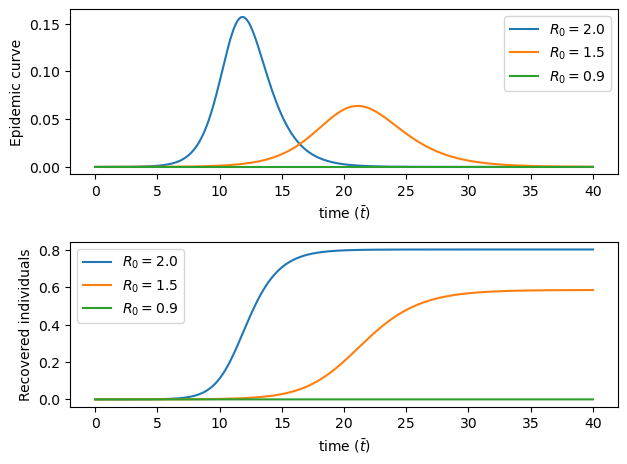

In [3]:
def flatten_curve() -> None:
    I_init: float = 0.00001
    S_init: float = 1.0 - I_init
    R_init: float = 0.0

    _, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set_ylabel("Epidemic curve")
    ax1.set_xlabel("time $(\\bar{t})$")
    ax2.set_ylabel("Recovered individuals")
    ax2.set_xlabel("time $(\\bar{t})$")
    plt.tight_layout()

    for R0_var in [2.0, 1.5, 0.9]:
        curve_data: dict[str:np.ndarray] = simulate_SIR(R0_var, S_init, I_init, R_init, 40)
        ax1.plot(curve_data["time_array"], curve_data["I_array"], label="$R_0=$"+str(R0_var))
        ax2.plot(curve_data["time_array"], curve_data["R_array"], label="$R_0=$"+str(R0_var))

    ax1.legend()
    ax2.legend()
    

def simulate_SIR(R0_var: float, S_init: float, I_init: float, R_init: float, total_time: float) -> dict[str:np.ndarray]:

    S_var: float = S_init
    I_var: float = I_init
    R_var: float = R_init
    tbar: float = 0.0

    delta_time: float = 0.1

    num_time_steps: int = int(total_time/delta_time) + 1
    S_array: np.ndarray = np.zeros(num_time_steps)
    I_array: np.ndarray = np.zeros(num_time_steps)
    R_array: np.ndarray = np.zeros(num_time_steps)
    time_array: np.ndarray = np.zeros(num_time_steps)

    for i in range(num_time_steps):
        S_array[i] = S_var
        I_array[i] = I_var
        R_array[i] = R_var
        time_array[i] = tbar

        delta_S: float = -R0_var*S_var*I_var
        delta_I: float = R0_var*S_var*I_var - I_var
        delta_R: float = I_var

        S_var += delta_S*delta_time
        I_var += delta_I*delta_time
        R_var += delta_R*delta_time
        
        tbar += delta_time
    
    return {
        "S_array": S_array,
        "I_array": I_array,
        "R_array": R_array,
        "time_array": time_array,
    }

flatten_curve()

**d.** Compare our numerical solution below to the text's approximate solution

$$ \frac{dR}{dt} = \frac{\gamma\alpha^2}{2S(0)R^2_0}\text{sech}^2\left(\frac{1}{2}\alpha\gamma t - \theta\right) $$
$$ \alpha = \left[\left(S(0)R_0-1\right)^2+2S(0)I(0)R^2_0\right]^{1/2} $$
$$ \theta = \text{tanh}^{-1}\left[\frac{1}{\alpha}\left(S(0)R_0-1\right)\right] $$

> Nondimensionalizing $\frac{dR}{dt}$:
> $$
\frac{dR}{d\bar{t}} = \frac{\gamma\alpha^2}{\gamma\cdot 2S(0)R^2_0}\text{sech}^2\left(\frac{1}{2}\alpha \bar{t} - \theta\right)
\\\ \\\ \quad
= \frac{\alpha^2}{2S(0)R^2_0}\text{sech}^2\left(\frac{1}{2}\alpha t - \theta\right)
$$

Text(0, 0.5, 'Epidemic curve')

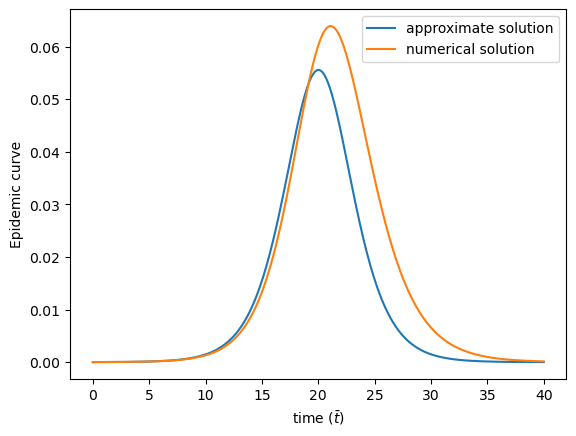

In [4]:
def plot_approximate(R0_var: float, S_init: float, I_init: float, R_init: float, total_time: float) -> None:
    ALPHA: float = ((S_init*R0_var-1)**2+2*S_init*I_init*(R0_var**2))**0.5
    THETA: float = np.arctanh((1/ALPHA)*(S_init*R0_var-1))

    delta_time: float = 0.1
    t: float = 0.0

    num_time_steps: int = int(total_time/delta_time) + 1
    I_array: np.ndarray = np.zeros(num_time_steps)
    time_array: np.ndarray = np.zeros(num_time_steps)

    for i in range(num_time_steps):

        I_array[i] = (ALPHA**2)/(2*S_init*(R0_var**2))*(1-(np.tanh(0.5*ALPHA*t-THETA))**2)
        time_array[i] = t
        
        t += delta_time
    
    plt.plot(time_array, I_array, label="approximate solution")


def plot_numerical(R0_var: float, S_init: float, I_init: float, R_init: float, ticks: int) -> None:
    curve_data: dict[str:np.ndarray] = simulate_SIR(R0_var, S_init, I_init, R_init, ticks)
    plt.plot(curve_data["time_array"], curve_data["I_array"], label="numerical solution")


R0_var: int = 1.5
I_init: float = 0.00001
S_init: float = 1.0 - I_init
R_init: float = 0.0
total_time: float = 40.0
plot_approximate(R0_var, S_init, I_init, R_init, total_time)
plot_numerical(R0_var, S_init, I_init, R_init, total_time)
plt.legend()
plt.xlabel("time $(\\bar{t})$")
plt.ylabel("Epidemic curve")

## 3. Effects of quarantining
**a.**  Show that if we define a dimensionless time, $\bar{t} = \gamma t$, the equations can be written in a simpler form: 

> The following assumes that $\frac{1}{\gamma}\cdot\frac{dF}{dt}=\frac{dF}{d(\gamma t)} = \frac{dF}{d\bar{t}}$ for functions $S$, $I$, $R$, and $Q$
> 
> $$R_0 = \frac{\beta}{\gamma+d_I+\mu}, \quad\quad 
\frac{\mu}{\gamma}=\bar{\mu}, \quad\quad 
\frac{\beta}{\gamma}=\bar{\beta}, \quad\quad
\frac{d_I}{\gamma}=\bar{\beta}, \quad\quad
\frac{\tau_Q^{-1}}{\gamma} = \frac{\gamma}{\gamma} = 1
\\\ \\\ \\\
\frac{dS}{dt} = \mu -\beta SI - \mu S \quad\quad\quad\quad
\frac{dI}{dt} = \beta SI - \left( \gamma + d_I + \mu \right) I \quad\quad\quad\quad
\frac{dR}{dt} = \gamma I + \tau_Q^{-1}Q - \mu R \quad\quad\quad\quad
\frac{dQ}{dt} = d_II -\tau_Q^{-1}Q
\\\ \\\
\frac{1}{\gamma}\cdot\frac{dS}{dt} = \frac{\mu}{\gamma} - \frac{\beta}{\gamma} SI - \frac{\mu}{\gamma} S \quad\quad\quad
\frac{1}{\gamma}\cdot\frac{dI}{dt} = \frac{\beta}{\gamma} SI - \left( \frac{\gamma}{\gamma} + \frac{d_I}{\gamma} + \frac{\mu}{\gamma} \right) I \quad\quad\quad
\frac{1}{\gamma}\cdot\frac{dR}{dt} = \frac{\gamma}{\gamma} I + \frac{\tau_Q^{-1}}{\gamma}Q - \frac{\mu}{\gamma}Q \quad\quad\quad
\frac{1}{\gamma}\cdot\frac{dQ}{dt} = \frac{d_II}{\gamma} I - \frac{\tau_Q^{-1}}{\gamma}Q
\\\ \\\
\frac{dS}{d(\gamma t)} = \frac{dS}{d\bar{t}} =  \bar{\mu} -\bar{\beta} SI - \bar{\mu} S \quad\quad\quad
\frac{dI}{d(\gamma t)} = \frac{dI}{d\bar{t}} = \bar{\beta} SI - \left( 1 + \bar{d_I} + \bar{\mu} \right) I \quad\quad\quad
\frac{dR}{d(\gamma t)} = \frac{dI}{d\bar{t}} = I + Q - \bar{\mu} R \quad\quad\quad
\frac{dQ}{dt} = \frac{dQ}{d\bar{t}} = \bar{d_I}I - Q
\\\ \\\
$$

**b.** For a lifespan of 75 years, recovery period of 1 week, and an $R_0=2$, explore the effects of varying the quarantine detection rate ($\bar{d_I}=0,0.1, 0.5$). Plot the epidemic curve.
- A small detection rate of $\bar{d_I}=0.5$, fairly easy for a disease like COVID, has a significant impact on the epidemic. Comment on factors that may limit $\bar{d_I}$
> Diseases like COVID may have an incubation period where you have contracted the disease but do not show symptoms. $d_I$ may be much lower than expected due to presymptomatic transmissions. The effectiveness of quarantine may also be limited. Quarantined individuals may still contact the outside world i.e. go shopping, go to a crowded clinic for COVID testing, have loved ones bring them food, etc. Some symptomatic individuals may not want to quarantine or lack access to the proper resources to quarantine properly i.e. a second bedroom, proper masks, etc. This would also effectively reduce $d_I$
- You should find that you get essentially the same results if you set $\bar{\mu}= 0$. Why?
> The value of mu does not change the reproductive ratio as it is hundreds of times smaller than gamma. People recover much faster than they will die, so the effect of mu is extremely small.

Text(0, 0.5, 'Epidemic curve')

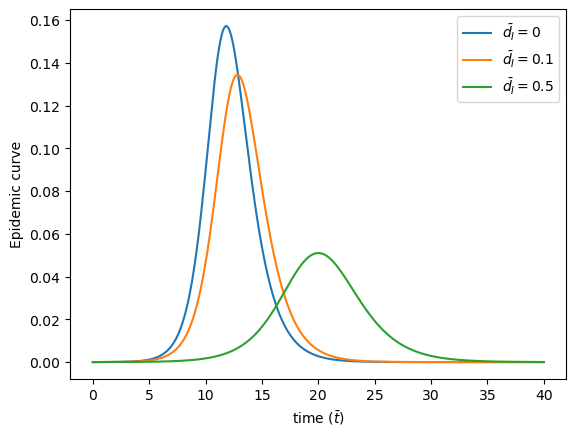

In [5]:
# The given rate constants in terms of 1/year
gamma = 52 # 1 recovery / week = 52 recoveries /year
mu = 1/75

# Nondimensionalized rate constants
R0 = 2
mu_bar = mu/gamma
beta_bar = R0*(1+mu_bar)

for dI_bar in [0, 0.1, 0.5]:

    I_var: float = 0.00001
    S_var: float = 1 - I_var
    R_var: float = 0.0
    Q_var: float = 0.0
    t: float = 0.0

    total_time = 40
    delta_time: float = 0.1

    num_time_steps: int = int(total_time/delta_time) + 1
    I_array: np.ndarray = np.zeros(num_time_steps)
    Q_array: np.ndarray = np.zeros(num_time_steps)

    time_array: np.ndarray = np.zeros(num_time_steps)

    for i in range(num_time_steps):
        I_array[i] = I_var
        Q_array[i] = Q_var
        time_array[i] = t

        delta_S: float = mu_bar - beta_bar*S_var*I_var - mu_bar*S_var
        delta_I: float = beta_bar*S_var*I_var - (1+dI_bar+mu_bar)*I_var
        delta_R: float = I_var + Q_var - mu_bar*R_var
        delta_Q: float = dI_bar*I_var - Q_var

        S_var += delta_S*delta_time
        I_var += delta_I*delta_time
        R_var += delta_R*delta_time
        Q_var += delta_Q*delta_time
        
        t += delta_time
    
    plt.plot(time_array, np.add(I_array, Q_array), label="$\\bar{d_I}=$" + str(dI_bar))

plt.legend()
plt.xlabel("time $(\\bar{t})$")
plt.ylabel("Epidemic curve")